<a href="https://colab.research.google.com/github/AetherSparks/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction_AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
!pip install shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


In [101]:
from google.colab import files
uploaded = files.upload()  # This will allow you to upload your file


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [102]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv']))


In [103]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
df.isnull().sum()  # Check for missing values
df.dropna(inplace=True)  # Drop rows with missing values


In [105]:
# Convert 'TotalCharges' to numeric (as some rows might have incorrect types)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop customerID since it's not relevant for prediction
df.drop('customerID', axis=1, inplace=True)

# One-hot encoding for categorical columns
df = pd.get_dummies(df, drop_first=True)


In [106]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [155]:
import pandas as pd
import plotly.graph_objects as go

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='Reds',  # Changed color scale to 'Viridis'
    colorbar=dict(title='Correlation Coefficient'),
    hovertemplate='Feature 1: %{x}<br>Feature 2: %{y}<br>Correlation: %{z:.2f}<extra></extra>'
))

# Update layout
fig.update_layout(
    title='Feature Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    width=900,  # Set the width of the plot
    height=800,  # Set the height of the plot
)

# Show plot
fig.show()


In [108]:
print(df.columns)


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')


<Axes: xlabel='Churn_Yes', ylabel='count'>

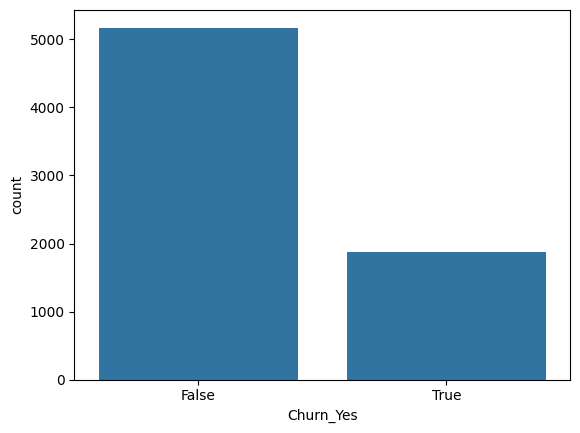

In [109]:
sns.countplot(x='Churn_Yes', data=df)


In [110]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Labels for gender and churn
g_labels = ['Male', 'Female']
c_labels = ['Yes', 'No']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Use the gender_Male column: 1 for Male, 0 for Female
gender_counts = df['gender_Male'].value_counts()
gender_values = [gender_counts[1], gender_counts[0]]  # Male, Female

# Use the Churn_Yes column: 1 for Yes, 0 for No
churn_counts = df['Churn_Yes'].value_counts()
churn_values = [churn_counts[1], churn_counts[0]]  # Yes, No

# Add gender pie chart
fig.add_trace(go.Pie(labels=g_labels, values=gender_values, name="Gender"), 1, 1)

# Add churn pie chart
fig.add_trace(go.Pie(labels=c_labels, values=churn_values, name="Churn"), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

# Layout settings
fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
        dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)
    ]
)

fig.show()


In [111]:
print(df['Churn_Yes'].unique())


[False  True]


In [112]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame with necessary columns
# Calculate churn counts
churn_counts = df['Churn_Yes'].value_counts()
values = [churn_counts.get(True, 0), churn_counts.get(False, 0)]  # Churn: Yes, Churn: No

# Calculate churn counts by gender
gender_counts = df.groupby(['Churn_Yes', 'gender_Male']).size().unstack(fill_value=0)

# Use boolean indexing for sizes based on churn values
sizes_gender = [
    gender_counts.loc[True, True],   # Male Churned
    gender_counts.loc[True, False],  # Female Churned
    gender_counts.loc[False, True],  # Male Not Churned
    gender_counts.loc[False, False]   # Female Not Churned
]

# Labels
labels = ["Churn: Yes", "Churn: No"]
labels_gender = ["Male Churned", "Female Churned", "Male Not Churned", "Female Not Churned"]

# Create a figure
fig = go.Figure()

# Add churn distribution pie chart
fig.add_trace(go.Pie(labels=labels, values=values,
                     name="Churn Distribution",
                     hoverinfo='label+percent',
                     textinfo='value',
                     pull=[0.1, 0.1]))

# Add gender distribution pie chart
fig.add_trace(go.Pie(labels=labels_gender, values=sizes_gender,
                     name="Gender Distribution",
                     hoverinfo='label+percent',
                     textinfo='value',
                     pull=[0.1, 0.1, 0.1, 0.1],
                     domain=dict(x=[0.5, 1], y=[0, 1])))

# Update layout
fig.update_layout(
    title_text='Churn Distribution w.r.t Gender: Male (M), Female (F)',
    title_x=0.5,
    grid=dict(rows=1, columns=2)
)

# Show plot
fig.show()


In [113]:
X = df.drop('Churn_Yes', axis=1)  # Features
y = df['Churn_Yes']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [115]:
# Check for missing values
print(df.isnull().sum())
df.dropna(inplace=True)


SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [116]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [117]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [118]:
y_pred = model.predict(X_test)
rf_pred = rf_model.predict(X_test)


In [119]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409

Confusion Matrix:
[[935 101]
 [151 222]]
Accuracy: 0.8211497515968772


In [120]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1036
        True       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Confusion Matrix:
[[946  90]
 [197 176]]
Accuracy: 0.7963094393186657


In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_


In [122]:
y_pred = model.predict(X_test)


In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[935 101]
 [151 222]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      1036
        True       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409


Accuracy: 0.8211497515968772


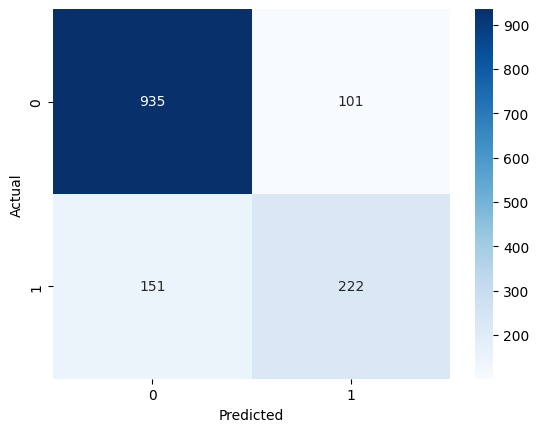

In [124]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [125]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nAccuracy:", accuracy_score(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1036
        True       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409


Accuracy: 0.7920511000709723


In [126]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


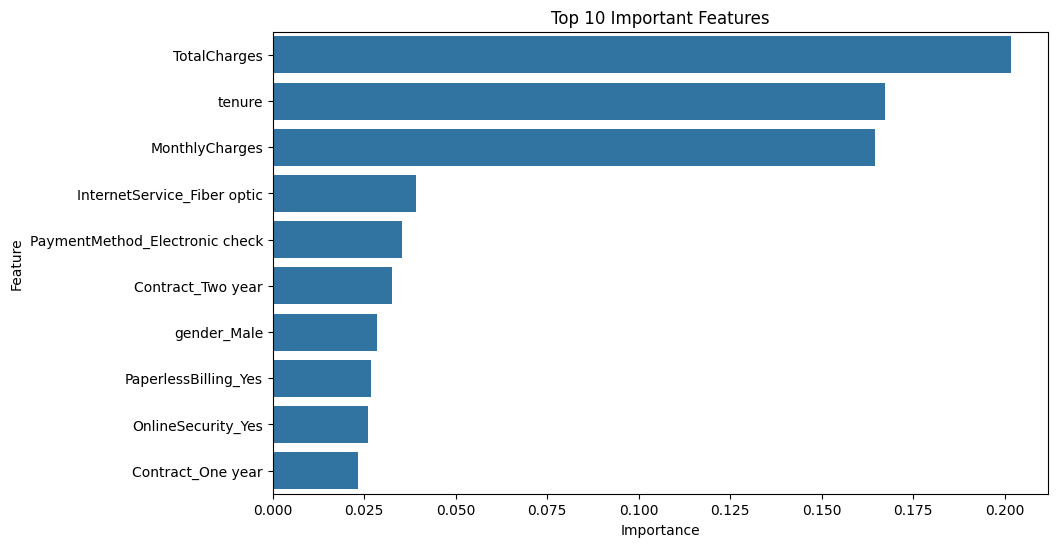

In [127]:
# Feature Importance for RandomForest
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()


In [128]:
# Check for missing values in each column
print(X.isnull().sum())


X = X.dropna()  # Drops rows with NaN values
y = y.loc[X.index]  # Align the target variable with the new X


from sklearn.impute import SimpleImputer

# Use the mean to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Now use the imputed data for your model


SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [129]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.80597015 0.80525942 0.79089616 0.80938834 0.80654339]
Mean accuracy: 0.8036114893931077


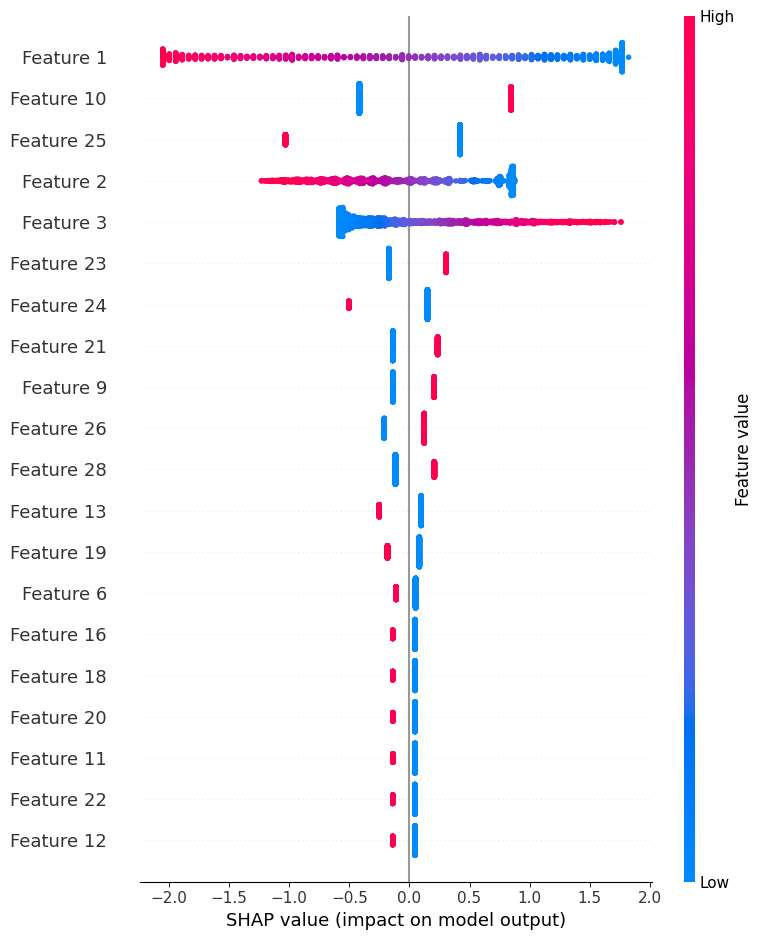

In [130]:
import shap

# Create a SHAP explainer based on your LogisticRegression model
explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)


In [131]:
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_churn_model.pkl')

# To load the model back later
# loaded_model = joblib.load('logistic_regression_churn_model.pkl')


['logistic_regression_churn_model.pkl']

In [132]:
########################################################################################################################################################